In [1]:
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import random
import math
from itertools import product

In [2]:
def draw_plot(x, y, x_label, y_label, title):    
    x = np.array(x)
    y = np.array(y)
    plt.plot(x, y)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [3]:
class RegressionWithGradient:
    coef = [0,0,0]
    
    def __init__(self, l_rate=0.1, epochs=1000):
        self.l_rate = l_rate
        self.epochs = epochs
    
    def calc_error(self, actual, expected):
        return np.mean(np.square(actual - expected))
        
    
    def refit(self, X_train, Y_train, draw_curve=False):
        self.coef = [0,0,0]
        points = []
        for epoch in range(self.epochs):
            yhat = self.predict(X_train)
            
            points.append(self.calc_error(yhat, Y_train))
            
            diff = yhat - Y_train
            
            self.coef[0] = self.coef[0] - self.l_rate * np.mean(diff)
            self.coef[1] = self.coef[1] - self.l_rate * np.mean(diff * X_train.iloc[:, 0])
            self.coef[2] = self.coef[2] - self.l_rate * np.mean(diff * X_train.iloc[:, 1])
            
        points.append(self.calc_error(self.predict(X_train), Y_train))
        
        if draw_curve:
            print('Error: %.0f * 10^6' % (points[-1] / 1000000))
            draw_plot(
                np.arange(0, self.epochs + 1), 
                points, 
                'number of epoch', 
                'MSE', 
                'Learning curve for gradient, l_rate = %.2f' % self.l_rate
            )
        
    def predict(self, X_test):
        return self.coef[0] + np.sum(self.coef[1:] * X_test, axis=1)

In [4]:
class RegressionWithGenetic:
    #differential weight [0,2]
    F = 1
    #crossover probability [0,1]
    CR = 0.5
    #dimensionality of problem, means how many variables problem has. this case 3 (data1,data2,data3)
    N = 3
    
    def __init__(self, iter=100, population_size = 30, diff_weight = 1, cross_prob = 0.5):
        self.iter = iter
        self.population_size = population_size
        self.F = diff_weight
        self.CR = cross_prob
        self
            
    def clear(self):
        self.coef = [0,0,0]
        self.population = []
        i = 0
        while i < self.population_size:
            i += 1
            c1 = random.uniform(-1000, 1000)
            c2 = random.uniform(-1000, 1000)
            c3 = random.uniform(-1000, 1000)
            self.population.append([c1, c2, c3])
        
    
    def calc_error(self, actual, expected):
        return np.mean(np.square(actual - expected))
        
    def predict(self, X_test):
        return self.coef[0] + np.sum(self.coef[1:] * X_test, axis=1)
            
    def fitness(self, c, X_train, Y_train):
        self.coef[0] = c[0]
        self.coef[1] = c[1]
        self.coef[2] = c[2]
        yhat = self.predict(X_train)
        return self.calc_error(Y_train, yhat)    
         
    def refit(self, X_train, Y_train, draw_curve=False):
        self.clear()
        points = []
        i = 0
        for k in range (self.iter):
            i += 1
            j = 0
            best_c = [0, 0, 0]
            while j < self.population_size:
                x = math.floor(random.uniform(0, self.population_size))
                a = 0
                b = 0
                c = 0
                
                while True:
                    a = math.floor(random.uniform(0, self.population_size))
                    if (a != x):
                        break
                while True:
                    b = math.floor(random.uniform(0, self.population_size))
                    if (a != x and b != a):
                        break
                while True:
                    c = math.floor(random.uniform(0, self.population_size))
                    if (a != x and b != a and c != b):
                        break

                R = math.floor(random.uniform(0, self.N))

                c0 = self.population[x]
                c1 = self.population[a]
                c2 = self.population[b]
                c3 = self.population[c]
                cx = c0[:]

                if 0 == R or random.random() < self.CR:
                    cx[0] = c1[0] + self.F * (c2[0] - c3[0])
                if 1 == R or random.random() < self.CR:
                    cx[1]=c1[1] + self.F * (c2[1] - c3[1])
                if 2 == R or random.random() < self.CR:
                    cx[2] = c1[2] + self.F * (c2[2] - c3[2])

                if self.fitness(cx, X_train, Y_train) < self.fitness(c0, X_train, Y_train):
                    self.population.remove(c0)
                    self.population.append(cx)
                    if self.fitness(cx, X_train, Y_train) < self.fitness(best_c, X_train, Y_train):
                        best_c = cx
                else:
                    best_c = c0
                j += 1
            points.append(self.fitness(best_c, X_train, Y_train))
            self.coef = best_c
              
        if draw_curve:
            print('Error: %.0f * 10^6' % (points[-1] / 1000000))  
            draw_plot(
                np.arange(1, self.iter+1), 
                points, 
                'number of iterations', 
                'MSE', 
                'Learning curve for genetics: population = %d, diff_weight = %.2f, cross_prob = %.2f' % (self.population_size, self.F, self.CR)
            )


In [5]:
df = pd.read_csv('prices.csv')
X_train = df.iloc[:, :-1] 
Y_train = df.iloc[:, -1]
X_train_normalized = (X_train - X_train.mean()) / X_train.std()
#X_train_normalized

Error: 4087 * 10^6


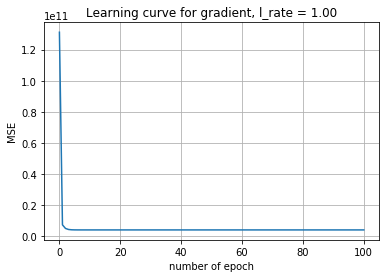

Error: 21242 * 10^6


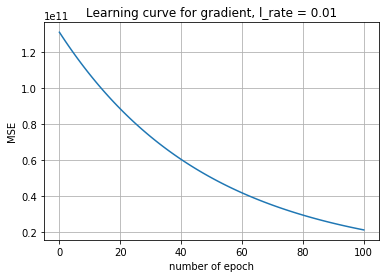

Error: 4087 * 10^6


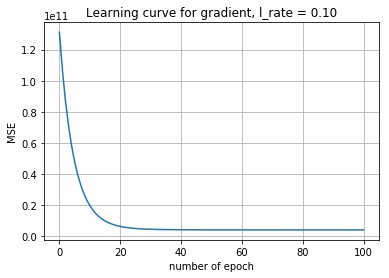

In [6]:
# experimaents with hyperparamters of gradient

gradient_regressor = RegressionWithGradient(l_rate=1, epochs=100)
gradient_regressor.refit(X_train_normalized, Y_train, draw_curve=True)

gradient_regressor = RegressionWithGradient(l_rate=0.01, epochs=100)
gradient_regressor.refit(X_train_normalized, Y_train, draw_curve=True)

gradient_regressor = RegressionWithGradient(l_rate=0.1, epochs=100)
gradient_regressor.refit(X_train_normalized, Y_train, draw_curve=True)

Error: 4087 * 10^6


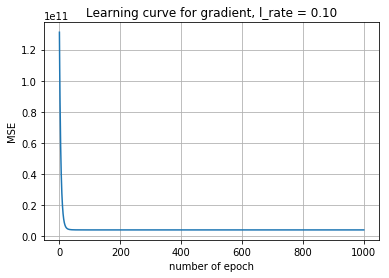

In [96]:
gradient_regressor = RegressionWithGradient(l_rate=0.1, epochs=1000)
gradient_regressor.refit(X_train_normalized, Y_train, draw_curve=True)

Error: 127482 * 10^6


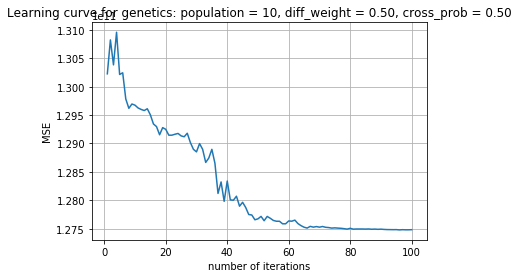

Error: 4091 * 10^6


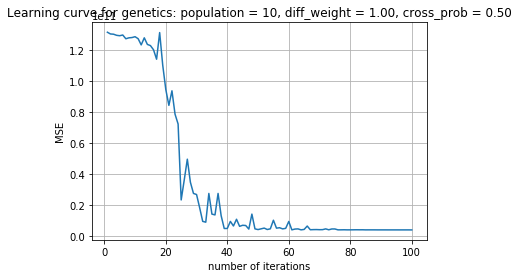

Error: 4123 * 10^6


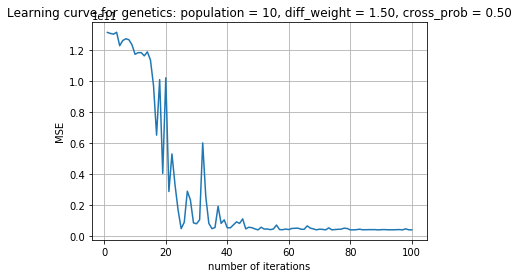

Error: 83596 * 10^6


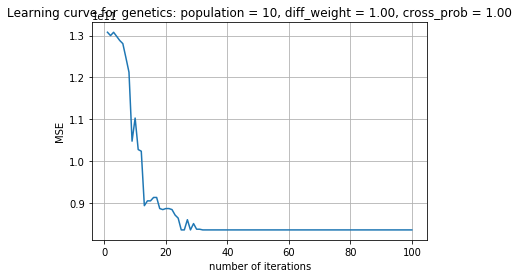

Error: 4091 * 10^6


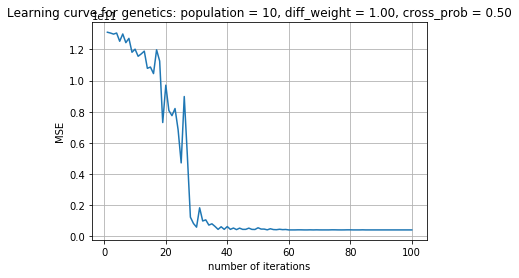

Error: 4090 * 10^6


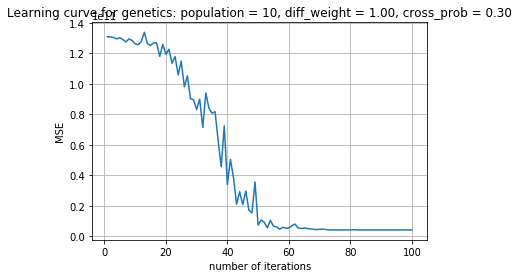

Error: 101745 * 10^6


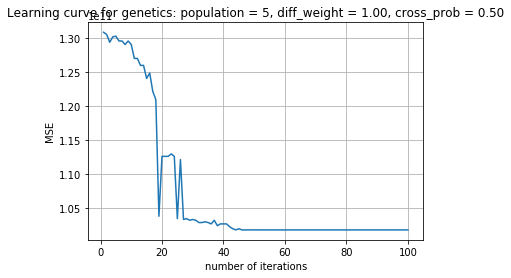

Error: 4087 * 10^6


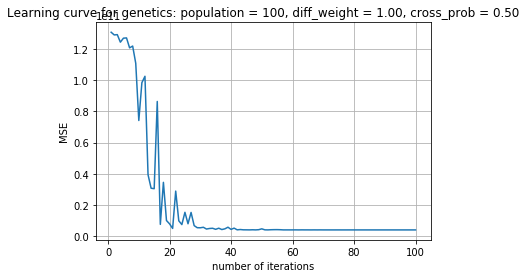

In [97]:
# experiments with different hyperparamters for genetics

genetics_regressor = RegressionWithGenetic(iter=100, population_size=10, diff_weight=0.5, cross_prob=0.5)
genetics_regressor.refit(X_train_normalized, Y_train, draw_curve=True)

genetics_regressor = RegressionWithGenetic(iter=100, population_size=10, diff_weight=1.0, cross_prob=0.5)
genetics_regressor.refit(X_train_normalized, Y_train, draw_curve=True)

genetics_regressor = RegressionWithGenetic(iter=100, population_size=10, diff_weight=1.5, cross_prob=0.5)
genetics_regressor.refit(X_train_normalized, Y_train, draw_curve=True)


genetics_regressor = RegressionWithGenetic(iter=100, population_size=10, diff_weight=1.0, cross_prob=1)
genetics_regressor.refit(X_train_normalized, Y_train, draw_curve=True)

genetics_regressor = RegressionWithGenetic(iter=100, population_size=10, diff_weight=1.0, cross_prob=0.5)
genetics_regressor.refit(X_train_normalized, Y_train, draw_curve=True)

genetics_regressor = RegressionWithGenetic(iter=100, population_size=10, diff_weight=1.0, cross_prob=0.3)
genetics_regressor.refit(X_train_normalized, Y_train, draw_curve=True)


genetics_regressor = RegressionWithGenetic(iter=100, population_size=5, diff_weight=1.0, cross_prob=0.5)
genetics_regressor.refit(X_train_normalized, Y_train, draw_curve=True)

genetics_regressor = RegressionWithGenetic(iter=100, population_size=100, diff_weight=1.0, cross_prob=0.5)
genetics_regressor.refit(X_train_normalized, Y_train, draw_curve=True)

Error: 4088 * 10^6


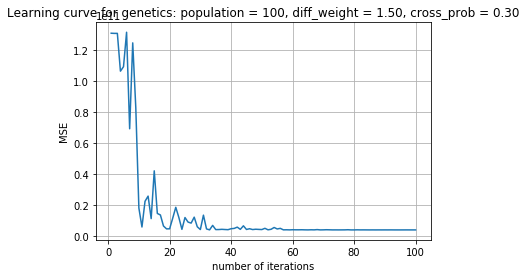

In [99]:
genetics_regressor = RegressionWithGenetic(iter=100, population_size=100, diff_weight=1.5, cross_prob=0.3)
genetics_regressor.refit(X_train_normalized, Y_train, draw_curve=True)

In [27]:
AREA_ITERS = 10
ROOMS_NUMBER = 5

regressor = gradient_regressor # change to genetics if needed

X_test = pd.DataFrame(list(product(np.linspace(500, 5000, AREA_ITERS), np.arange(1, ROOMS_NUMBER + 1))), columns=['area', 'rooms'])
X_test_norm = (X_test - X_train.mean()) / X_train.std()
Y_test = regressor.predict(X_test_norm)


In [ ]:
x_surface = X_test.iloc[:,0].values.reshape((AREA_ITERS, ROOMS_NUMBER))
y_surface = X_test.iloc[:,1].values.reshape((AREA_ITERS, ROOMS_NUMBER))
z_surface = Y_test.values.reshape((AREA_ITERS, ROOMS_NUMBER))

x_scatter = X_train.iloc[:,0]
y_scatter = X_train.iloc[:,1]
z_scatter = Y_train

scatter = go.Scatter3d(
    x=x_scatter, 
    y=y_scatter, 
    z=z_scatter,
    mode='markers',
    marker=dict(
        color='rgb(25, 25, 25)',
        size=3,
        symbol='circle',
        opacity=0.9
    )
)
surface = go.Surface(
    x=x_surface, 
    y=y_surface, 
    z=z_surface
)
data = [surface,scatter]

layout = go.Layout(
    title='Regression'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Regression')

In [ ]:
def predict_gradient(area, rooms):
    temp = pd.DataFrame([[area, rooms]], columns=['area', 'rooms'])
    temp = (temp - X_train.mean()) / X_train.std() # normalization
    print(np.round(gradient_regressor.predict(temp)[0]))

def predict_genetics(area, rooms):
    temp = pd.DataFrame([[area, rooms]], columns=['area', 'rooms'])
    temp = (temp - X_train.mean()) / X_train.std() # normalization
    print(np.round(genetics_regressor.predict(temp)[0]))

In [ ]:
predict_gradient(4000, 5)
predict_genetics(4000, 5)